# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Ahmed Hassan

ID: 58-0671

Tutorial: 07

---

Name: Ziad Ekramy

ID: 58-6936

Tutorial: 07

---


## Dataset Description

The following dataset includes information about loan applicants, including factors such as income, credit score, employment status, loan details, and other indicators of financial stability, along with the final decision showing whether each loan was approved or not.

| Column | Description|
|-|-|
|ApplicationNumber|Unique identifier assigned to each loan application|
|Age|Applicant’s age in years|
|AnnualIncome|Applicant’s yearly income|
|CreditScore|A score representing the applicant’s creditworthiness|
|EmploymentStatus|Applicant’s current employment situation (Employed, Unemployed, Self-Employed)|
|EducationLevel|Highest educational qualification attained (Highschool, Bachelor, Master, Doctorate, Diploma)|
|LoanAmount|Total amount of money requested for the loan|
|LoanDuration|Duration of the loan in months|
|MaritalStatus|Applicant’s marital state (Divorced, Married, Single, Widowed)|
|NumberOfDependents|Number of individuals financially dependent on the applicant|
|HomeOwnershipStatus|Applicant’s housing status (Mortagage, Own, Rent, Other)|
|BankruptcyHistory|Indicates whether the applicant has previously declared bankruptcy (0 = No, 1 = Yes)|
|LoanPurpose|The primary reason for taking the loan (Debt Consolidation, Home Improvement, Education, Personal)|
|PreviousLoanDefaults|Indicates if the applicant has defaulted on any previous loans (0 = No, 1 = Yes)|
|MonthlyLoanPayment|Amount the applicant would need to pay monthly to repay the loan|
|MonthlyIncome|Average monthly income of the applicant|
|JobTenure|Number of years the applicant has been in their current job|
|LoanApproved|Indicates loan approval status (No = Not Approved, Yes = Approved)|

## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/main/data/loan_data.csv')
df.head()

,ApplicationNumber,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,MonthlyLoanPayment,MonthlyIncome,JobTenure,LoanApproved
0,26231,18,"$26,992.00",586,Employed,Diploma,"$22,432.00",36 months,Single,3,Mortgage,0,Debt Consolidation,0,$623.11,"$2,249.33",3,No
1,13176,18,"$22,825.00",581,Self-Employed,Master,"$30,457.00",24 months,Single,0,Rent,0,Home Improvement,0,"$1,269.04","$1,902.08",5,No
2,27751,18,"$75,891.00",522,Employed,Bachelor,"$30,583.00",96 months,Married,2,Mortgage,0,Personal,0,$318.57,"$6,324.25",6,No
3,20628,18,"$92,094.00",565,Employed,Bachelor,"$72,738.00",36 months,Single,1,Mortgage,0,Vehicle,0,NaN,"$7,674.50",3,No
4,28773,18,"$35,686.00",554,Employed,Diploma,"$28,021.00",36 months,Married,3,Rent,0,Home Improvement,0,$778.36,"$2,973.83",1,No


## Data Inspection

In [2]:
df.shape #to provide the number of rows and columns, we started with 20,000 rows and 18 columns

(20000, 18)

In [3]:
df.info() #we can see here the columns with their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ApplicationNumber     20000 non-null  int64 
 1   Age                   20000 non-null  int64 
 2   AnnualIncome          20000 non-null  object
 3   CreditScore           20000 non-null  int64 
 4   EmploymentStatus      16260 non-null  object
 5   EducationLevel        20000 non-null  object
 6   LoanAmount            20000 non-null  object
 7   LoanDuration          20000 non-null  object
 8   MaritalStatus         20000 non-null  object
 9   NumberOfDependents    20000 non-null  int64 
 10  HomeOwnershipStatus   20000 non-null  object
 11  BankruptcyHistory     20000 non-null  int64 
 12  LoanPurpose           20000 non-null  object
 13  PreviousLoanDefaults  20000 non-null  int64 
 14  MonthlyLoanPayment    15660 non-null  object
 15  MonthlyIncome         17160 non-null

In [4]:
df.describe() #shows a summary of numerical columns

,ApplicationNumber,Age,CreditScore,NumberOfDependents,BankruptcyHistory,PreviousLoanDefaults,JobTenure
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,20000.000000
mean,20500.500000,39.752600,571.612400,1.517300,0.0,0.100050,5.002650
std,5773.647028,11.622713,50.997358,1.386325,0.0,0.300074,2.236804
min,10501.000000,18.000000,343.000000,0.000000,0.0,0.000000,0.000000
25%,15500.750000,32.000000,540.000000,0.000000,0.0,0.000000,3.000000
50%,20500.500000,40.000000,578.000000,1.000000,0.0,0.000000,5.000000
75%,25500.250000,48.000000,609.000000,2.000000,0.0,0.000000,6.000000
max,30500.000000,80.000000,712.000000,5.000000,0.0,1.000000,16.000000


In [5]:
df.isna().sum() #check for missing values per column

ApplicationNumber          0
Age                        0
AnnualIncome               0
CreditScore                0
EmploymentStatus        3740
EducationLevel             0
LoanAmount                 0
LoanDuration               0
MaritalStatus              0
NumberOfDependents         0
HomeOwnershipStatus        0
BankruptcyHistory          0
LoanPurpose                0
PreviousLoanDefaults       0
MonthlyLoanPayment      4340
MonthlyIncome           2840
JobTenure                  0
LoanApproved               0
dtype: int64

In [6]:
categorical_cols = df.select_dtypes(include=['object']).columns #check for unique values in each categorical column
for col in categorical_cols:
    print(f"--- {col} ---")
    print(df[col].unique())
    print("\n")


--- AnnualIncome ---
['$26,992.00' '$22,825.00' '$75,891.00' ... '$111,290.00' '$48,501.00'
 '$95,945.00']


--- EmploymentStatus ---
['Employed' 'Self-Employed' 'Unemployed' nan]


--- EducationLevel ---
['Diploma' 'Master' 'Bachelor' 'High School' 'Doctorate']


--- LoanAmount ---
['$22,432.00' '$30,457.00' '$30,583.00' ... '$29,111.00' '$26,447.00'
 '$66,707.00']


--- LoanDuration ---
['36 months' '24 months' '96 months' '72 months' '48 months' '60 months'
 '120 months' '12 months' '84 months' '108 months']


--- MaritalStatus ---
['Single' 'Married' 'Divorced' 'Widowed']


--- HomeOwnershipStatus ---
['Mortgage' 'Rent' 'Other' 'Own']


--- LoanPurpose ---
['Debt Consolidation' 'Home Improvement' 'Personal' 'Vehicle' 'Education']


--- MonthlyLoanPayment ---
['$623.11' '$1,269.04' '$318.57' ... '$1,010.88' '$471.36' '$926.49']


--- MonthlyIncome ---
['$2,249.33' '$1,902.08' '$6,324.25' ... '$9,274.17' '$4,041.75'
 '$7,995.42']


--- LoanApproved ---
['No' 'Yes' 'no' 'yes']




We have to clean a couple of columns like: 1) LoanApproved 2) EmploymentStatus

In [7]:
print("EmploymentStatus value counts:")
print(df["EmploymentStatus"].value_counts(dropna=False))
print("\n")

print("LoanApproved value counts:")
print(df["LoanApproved"].value_counts())
print("\n")

EmploymentStatus value counts:
EmploymentStatus
Employed         13866
NaN               3740
Self-Employed     1273
Unemployed        1121
Name: count, dtype: int64


LoanApproved value counts:
LoanApproved
No     15185
Yes     4745
no        35
yes       35
Name: count, dtype: int64




## Data Cleaning

Fixing Employment Status Column

In [8]:
df['EmploymentStatus'] = df['EmploymentStatus'].str.strip().str.title() 
#this fixes text inconsistency by treating employed and Employed as the same thing

df['EmploymentStatus'] = df['EmploymentStatus'].fillna('Unknown')
#instead of removing NaN values, we replace them with a new option: Unknown

Standerdize Loan Approved Column

In [9]:
df['LoanApproved'] = df['LoanApproved'].str.strip().str.title()
#this fixes text inconsistency by reading Yes and yes & No and no as the same thing

Covert data type of some columns from object to int

In [10]:
numeric_obj_cols = ['AnnualIncome', 'LoanAmount', 'LoanDuration', 
                    'MonthlyLoanPayment', 'MonthlyIncome']

for col in numeric_obj_cols:     #remove commas, currency symbols, or text, then convert
    df[col] = (df[col]
               .astype(str)
               .str.replace(r'[^0-9.-]', '', regex=True)
               .replace('', np.nan)
               .astype(float))

Fill missing rows in columns Monthly Income and Monthly Loan Payement with the median

In [11]:
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())
df['MonthlyLoanPayment'] = df['MonthlyLoanPayment'].fillna(df['MonthlyLoanPayment'].median()) 

We want to remove suspicious applications that can harm the model's learning

In [12]:
#we save the beginning row count (20000) so we can see how many invalid records get removed
original_rows = len(df)

#loan applicants are not under 18 or above 100, here we remove ages that are not realistic
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

#ensure income, loan amount, duration are positive, these financial fields cannot logically be zero or negative
df = df[df['AnnualIncome'] > 0]
df = df[df['LoanAmount'] > 0]
df = df[df['LoanDuration'] > 0]
df = df[df['MonthlyIncome'] > 0]
df = df[df['MonthlyLoanPayment'] > 0]

#credit score range is between 350 & 850, anything else is impossible
df = df[(df['CreditScore'] >= 300) & (df['CreditScore'] <= 850)]

#count how many rows were removed
cleaned_rows = len(df)
removed_rows = original_rows - cleaned_rows
removed_rows

0

## Inspect Data again 

In [13]:
print(df['EmploymentStatus'].value_counts())
print(df['LoanApproved'].value_counts()) 
#see the columns we fixed

EmploymentStatus
Employed         13866
Unknown           3740
Self-Employed     1273
Unemployed        1121
Name: count, dtype: int64
LoanApproved
No     15220
Yes     4780
Name: count, dtype: int64


In [14]:
df.info() #shows new data types and value count, we do not have any nullus since we have 20,000 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ApplicationNumber     20000 non-null  int64  
 1   Age                   20000 non-null  int64  
 2   AnnualIncome          20000 non-null  float64
 3   CreditScore           20000 non-null  int64  
 4   EmploymentStatus      20000 non-null  object 
 5   EducationLevel        20000 non-null  object 
 6   LoanAmount            20000 non-null  float64
 7   LoanDuration          20000 non-null  float64
 8   MaritalStatus         20000 non-null  object 
 9   NumberOfDependents    20000 non-null  int64  
 10  HomeOwnershipStatus   20000 non-null  object 
 11  BankruptcyHistory     20000 non-null  int64  
 12  LoanPurpose           20000 non-null  object 
 13  PreviousLoanDefaults  20000 non-null  int64  
 14  MonthlyLoanPayment    20000 non-null  float64
 15  MonthlyIncome      

In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns #check for unique values in each categorical column
for col in categorical_cols:
    print(f"--- {col} ---")
    print(df[col].unique())
    print("\n")

--- EmploymentStatus ---
['Employed' 'Self-Employed' 'Unemployed' 'Unknown']


--- EducationLevel ---
['Diploma' 'Master' 'Bachelor' 'High School' 'Doctorate']


--- MaritalStatus ---
['Single' 'Married' 'Divorced' 'Widowed']


--- HomeOwnershipStatus ---
['Mortgage' 'Rent' 'Other' 'Own']


--- LoanPurpose ---
['Debt Consolidation' 'Home Improvement' 'Personal' 'Vehicle' 'Education']


--- LoanApproved ---
['No' 'Yes']




## Exploratory Data Analysis

**Q1: On average, which type of educational level has the highest approval rate? Show their order on the graph.**

**Visualization**

In [16]:
#Encoding Yes & No into 1 & 0
df['LoanApprovedNumeric'] = df['LoanApproved'].map({'Yes': 1, 'No': 0})

#calculate approval rate for each education level by grouping by education to see which group gets approved more often on average.
edu_approval = df.groupby('EducationLevel')['LoanApprovedNumeric'].mean().sort_values()
edu_approval

EducationLevel
High School    0.144381
Diploma        0.204264
Bachelor       0.266435
Master         0.350820
Doctorate      0.440252
Name: LoanApprovedNumeric, dtype: float64

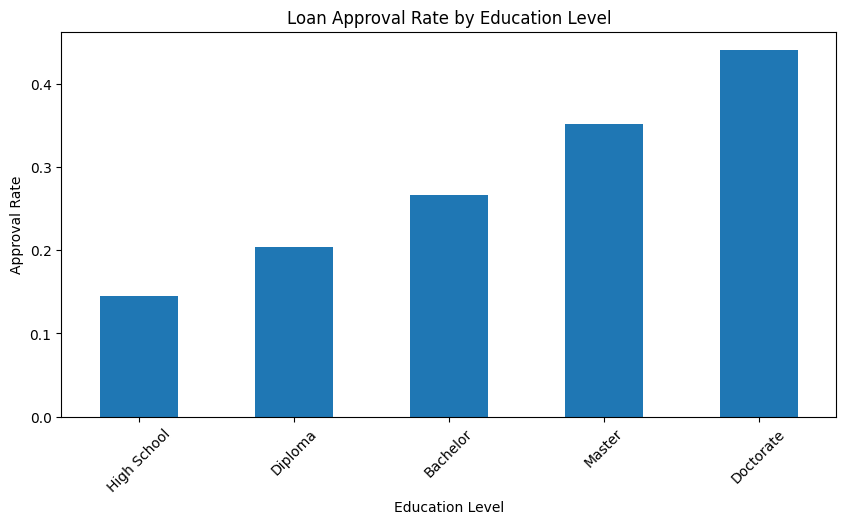

In [17]:
plt.figure(figsize=(10,5))
edu_approval.plot(kind='bar')

plt.title('Loan Approval Rate by Education Level')
plt.ylabel('Approval Rate')
plt.xlabel('Education Level')

plt.xticks(rotation=45)
plt.show()

#we used a bar chart because it is easy for the human eye to see the difference between every category

**Answer for Q1**: People with a doctorate are more likely to be approved

**Q2: How does the annual income vary among approved applicants? Interpret the values of the 3 quartiles.**

**Visualization**

In [18]:
#filter only approved applicants
approved_df = df[df['LoanApproved'] == 'Yes'].copy()


#calculate the quartiles
Q1 = approved_df['AnnualIncome'].quantile(0.25)
Q2 = approved_df['AnnualIncome'].quantile(0.50) 
Q3 = approved_df['AnnualIncome'].quantile(0.75)

Q1, Q2, Q3

(np.float64(67380.5), np.float64(91269.5), np.float64(123959.5))

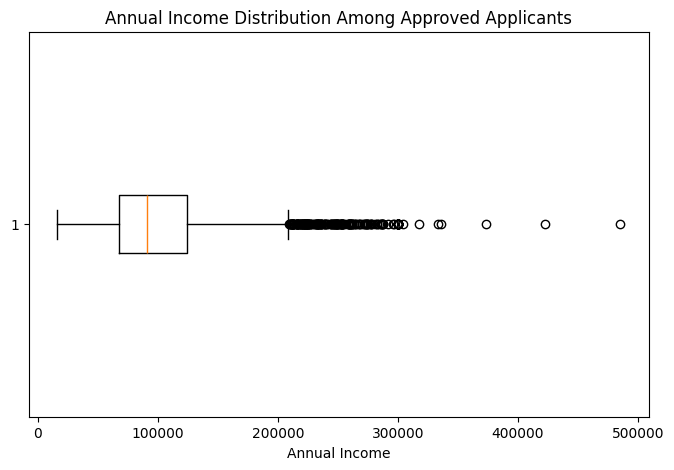

In [19]:
plt.figure(figsize=(8,5))
plt.boxplot(approved_df['AnnualIncome'], vert=False)

plt.title('Annual Income Distribution Among Approved Applicants')
plt.xlabel('Annual Income')
plt.show()

#boxplot is used because it clearly shows the distribution of a continuous variable and highlights the median and quartile boundaries
#we can easily identify q1, q2, and q3

**Answer for Q2**: Approved applicant earn between 67,380 and 124,000. The median is $91,270. However, this boxplot is heavily skewed to the right, shoing that there are a lot of outliers. The outliers show that a group of approved applicants make much more than the typical range.

**Q3: How does the age of an applicant affect their credit score? (Hint: Use the line of best fit.)**

**Visualization**

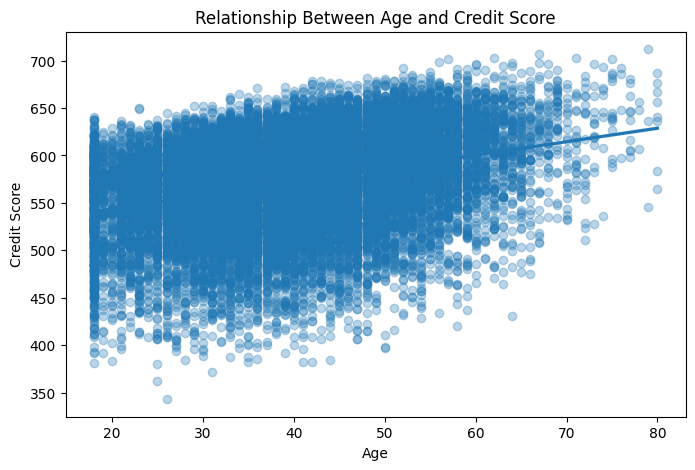

In [20]:
plt.figure(figsize=(8,5))
sns.regplot(data=df, x='Age', y='CreditScore', scatter_kws={'alpha':0.3})

plt.title('Relationship Between Age and Credit Score')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.show()

#we used a scatterplot to see the relationship between age and credit score, we can then see if age has a +ve, -ve or no relationship on credit score

**Answer for Q3**: Age has a diret effect on credit score. As age increases, so does the credit score.

**Q4: Is the distribution of applicants' income per month normal or skewed?**

**Visualization**

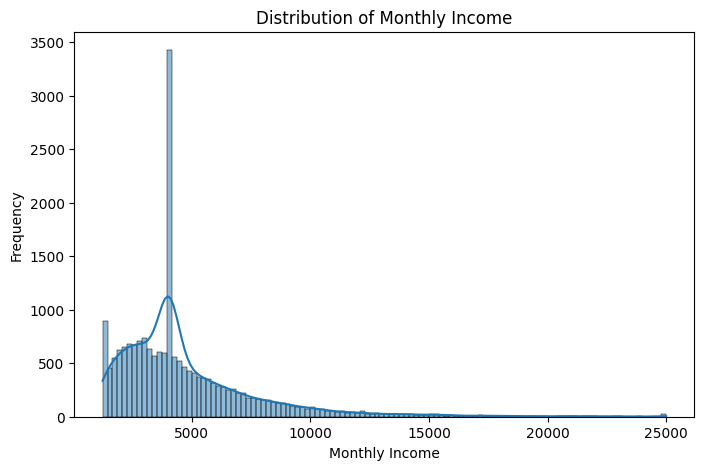

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df['MonthlyIncome'], kde=True)

plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

#histogram shows how values are distributed across income ranges, making it easier to determine whether it is normal, left skewed, or right skewed

**Answer for Q4**: The distribution is skewed right. This shows that most applicants have a low monthly income.

## Data Preparation for Modelling

In [22]:
df_model = df.drop(columns=['ApplicationNumber']) #drop unused columns

In [23]:
df_model['LoanApproved'] = df_model['LoanApproved'].map({'Yes': 1, 'No': 0}) #encode our dependent variable

In [24]:
df['Monthly_Debt_To_Income_Ratio'] = df['MonthlyLoanPayment'] / df['MonthlyIncome'] #Feature Engineering Monthly_Debt_To_Income_Ratio

In [25]:
df['Monthly_Debt_To_Income_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Monthly_Debt_To_Income_Ratio'].fillna(df['Monthly_Debt_To_Income_Ratio'].median(), inplace=True)
#replace infinite values with NaN, then replaces NaN with the median, to handle extreme values

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_8268\4191240424.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Monthly_Debt_To_Income_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_8268\4191240424.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [26]:
categorical_cols = [
    'EmploymentStatus', 'EducationLevel', 'MaritalStatus',
    'HomeOwnershipStatus', 'LoanPurpose'
]
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True) #one hot encoding for categorical columns

## Modelling

Check for Class Imbalance

In [27]:
target_counts = df_model['LoanApproved'].value_counts()

target_percent = df_model['LoanApproved'].value_counts(normalize=True) * 100

print("Counts:\n", target_counts)
print("\nPercentages:\n", target_percent)
#the output shows a strong imbalance. Most applications are rejected

Counts:
 LoanApproved
0    15220
1     4780
Name: count, dtype: int64

Percentages:
 LoanApproved
0    76.1
1    23.9
Name: proportion, dtype: float64


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
X = df_model.drop(["LoanApproved", "LoanApprovedNumeric"], axis=1)
y = df_model["LoanApprovedNumeric"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [31]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) #this is to handle class imbalance

In [33]:
model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42,
    class_weight=None   #because SMOTE already balanced the classes
)

model.fit(X_train_resampled, y_train_resampled)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [34]:
y_pred = model.predict(X_test)

## Evaluation

In [35]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm) #construct the confusion matrix


Confusion Matrix:
 [[2560  484]
 [ 144  812]]


Classification report shows results of 2 classes, 0 and 1. Approved class is 1 and Rejected is 0. It was encoded earlier in the EDA section.

In [36]:
cr = classification_report(y_test, y_pred)
print("\nClassification Report:\n", cr) #outputs: precision, recall, f1-score
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89      3044
           1       0.63      0.85      0.72       956

    accuracy                           0.84      4000
   macro avg       0.79      0.85      0.81      4000
weighted avg       0.87      0.84      0.85      4000

Accuracy: 0.843


## Decision Tree Visualization 

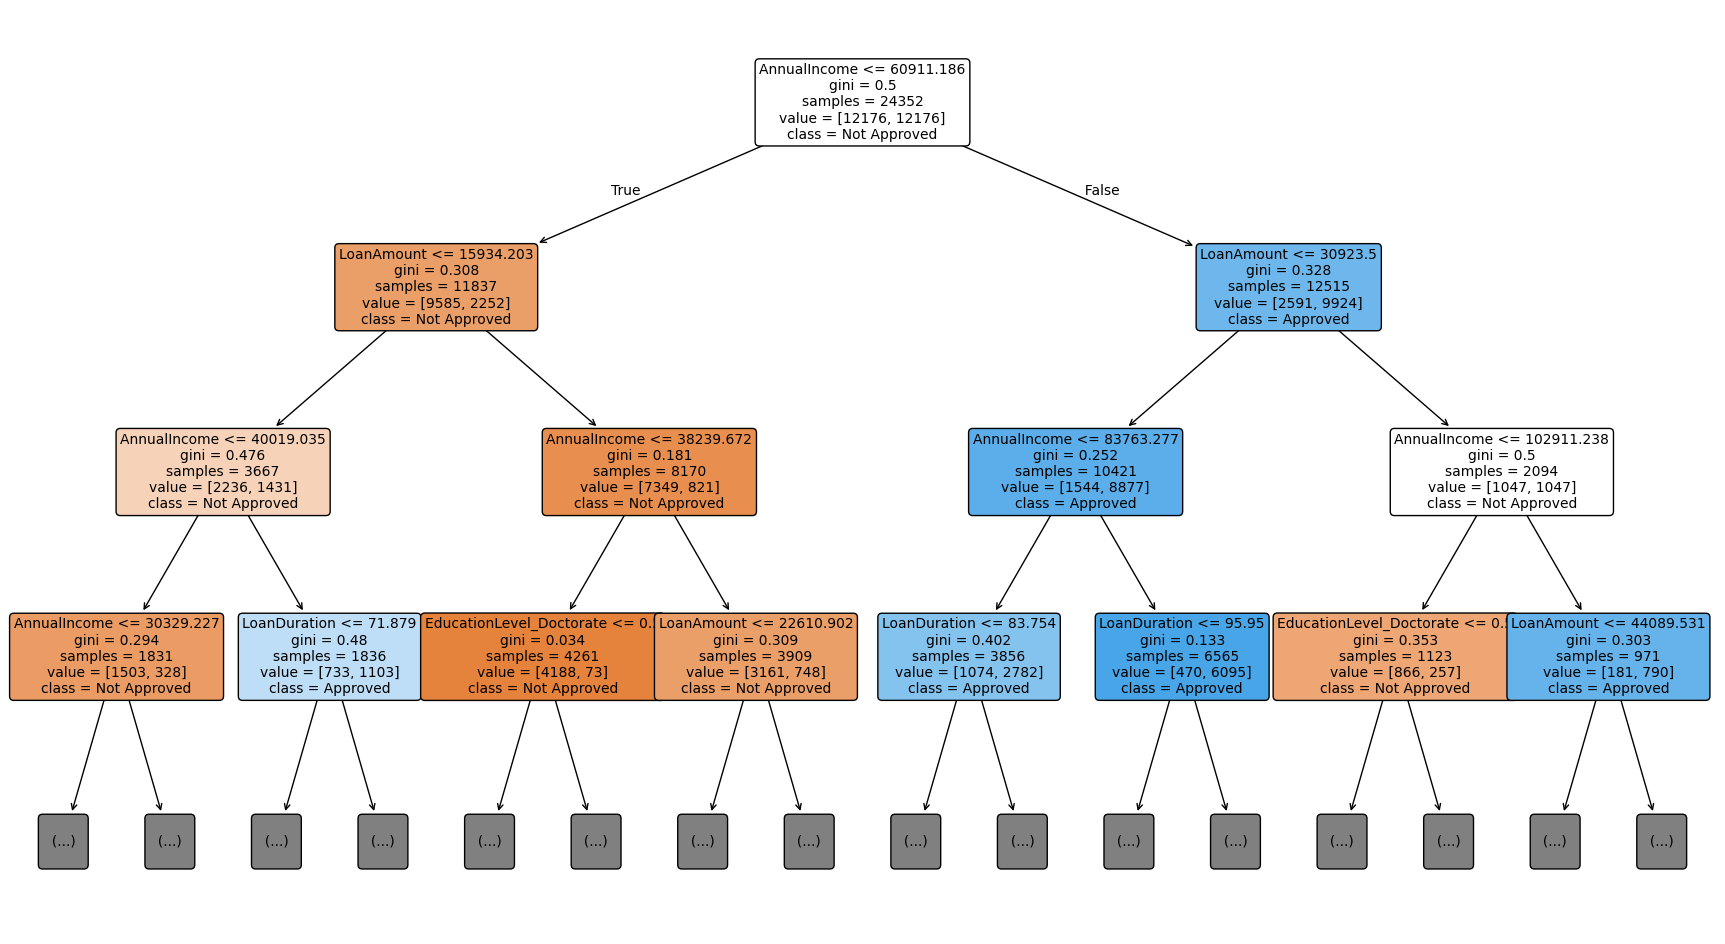

In [37]:
plt.figure(figsize=(22, 12))   
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Not Approved", "Approved"],
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3   # You can increase this, but 3 is readable
)
plt.show() #visualize tree

### Commenting on Decision Tree

### Rule Splits

1) The root node splits on AnnualIncome <= 60,911
2) On the left side, most paths tend to result in Not Approved unless other conditions (like short loan duration or smaller loan amount) are added.
3) On the right side, higher income and smaller loan amounts tend toward Approved outcomes.
4) The tree alternates between LoanAmount, LoanDuration, and EducationLevel.

### One rule of an Approved Loan

If annual income is greater than 60,911 and loan amount is less than or equal to 30,923.5 and annual income is less than or equal to 83,763.277 and Loan duration is greater than to 95.95 then approved

### Commenting on Performance + Giving a Final Recommendation

While the decision tree provides interpretability and good recall, its low precision on approved loans poses a business risk.

Strenghts:
1) High recall of approved loans, it does not reject good customers
2) Model is easliy understood by non technical people, clearly showing rules involving income, loan amount, and duration

Weaknesses:
1) Precision is very low, which results in many false approvals
2) Tree is overfitted, it can be pruned

#### Final Recommendation:
* We do not recommend using this model because the model will be wrong 37% of the time.
* We reached that number by subtracting: 1 - Precision score(0.63) = 0.37

#### Our Solution:
In the bonus section, we implemented a Random Forest model which boosted precision and F1-score, while still maintaining a good recall rate.

## Bonus (Optional)

### Random Forest Implementation 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight=None 
)

rf.fit(X_train_resampled, y_train_resampled)
rf_pred = rf.predict(X_test)

### Evaluation

In [ ]:
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))

### Comparison

The Random Forest classifier outperforms the Decision Tree across most key evaluation metrics like accuracy, F1-score for the approved class, and significantly reduced the amount of false negatives from 484 to 196. The Decision Tree achieved slightly higher recall for the “Approved” class, it suffered from low precision, meaning it incorrectly labeled many applicants as approved. We recommend using the random forest model becasue it is more stable. 